# Lab 3


In [32]:
%matplotlib inline

import math
import pylab 
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy.stats
import scipy.stats as stats
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import  LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore")

# Importing Dataset from Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/DATASET/fraudTrain.csv")
raw_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [2]:
import os
os.listdir('..')

['daily_data.csv',
 'irf.png',
 'Workshop3',
 'subsamples_lab_1.csv',
 'MMA_Lab_3_VA.ipynb',
 'MandM_MSA_labs',
 'task_4__final.ipynb',
 'step_6_7.ipynb',
 'subsamples_lab_2.csv',
 'subsamples_lab_3.csv',
 'Helpful',
 'lab_1.ipynb',
 'oldMMA_Report.pdf',
 'MMA_Lab_2.ipynb',
 'Credit Card Fraud Dataset',
 'Untitled.ipynb',
 'Workshop1.zip',
 'pdf_MaxL.csv',
 'preprocessed_data.csv',
 '.ipynb_checkpoints',
 'Workshop2',
 'plots',
 'Workshop3.zip',
 'Credit Card Fraud Dataset.zip',
 'Helpful.zip',
 'Workshop1',
 'pdf_LSq.csv',
 'MMA_Lab3.ipynb']

# Pre Processing the Dataset

In [4]:
if 'preprocessed_data.csv' in os.listdir('../'):
    df = pd.read_csv('../preprocessed_data.csv', index_col=0)
else:
    df = raw_data.copy()
    df['trans_date_trans_time'] = raw_data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x))
    df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.hour*60+x.minute)
    df['year_of_birth'] =  df['dob'].apply(lambda x: pd.to_datetime(x).year)
df.head()

/home/vladimir/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,minute,year_of_birth
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1988
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1978
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1962
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1967
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,1986


In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['date_of_birth_numeric'] = df['dob'].astype(int) / 10**9

In [15]:
cols = ['category', 'amt', 'gender', 'state', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'date_of_birth_numeric']
subsamples = df[cols].sample(5000)
subsamples.head()

,category,amt,gender,state,lat,long,merch_lat,merch_long,city_pop,date_of_birth_numeric
352172,personal_care,184.73,M,IN,41.2249,-85.0301,41.212041,-85.603081,5341,785635200.0
273956,personal_care,59.80,F,IN,39.8490,-86.2720,39.963761,-86.225209,910148,186537600.0
738555,misc_pos,37.26,F,NY,40.8295,-72.6473,40.258091,-72.787194,3255,268704000.0
484256,food_dining,102.44,F,UT,41.7100,-111.9817,40.841655,-110.997696,2078,-206841600.0
1038935,grocery_pos,87.06,M,TX,29.0393,-95.4401,29.384077,-95.469041,28739,946252800.0


We have a lot of categorical data, so we need to use LabelEncoder:

In [16]:
for column in ['category','gender','state']:
    le = LabelEncoder()
    subsamples[column] = le.fit_transform(subsamples[column].values)
subsamples.head()

,category,amt,gender,state,lat,long,merch_lat,merch_long,city_pop,date_of_birth_numeric
352172,10,184.73,1,14,41.2249,-85.0301,41.212041,-85.603081,5341,785635200.0
273956,10,59.80,0,14,39.8490,-86.2720,39.963761,-86.225209,910148,186537600.0
738555,9,37.26,0,33,40.8295,-72.6473,40.258091,-72.787194,3255,268704000.0
484256,1,102.44,0,42,41.7100,-111.9817,40.841655,-110.997696,2078,-206841600.0
1038935,4,87.06,1,41,29.0393,-95.4401,29.384077,-95.469041,28739,946252800.0


In [17]:
subsamples.to_csv('subsamples_lab_3.csv')

# Step 1: Variables
#### Predictors:
1. Transaction Amount
2. Customer Latitude
3. Customer Longitude 
4. Merchant Latitude
5. Merchant Longitude 
6. City Population
7. Year of Birth

#### Targets:
1. Category 
2. Gender
3. State



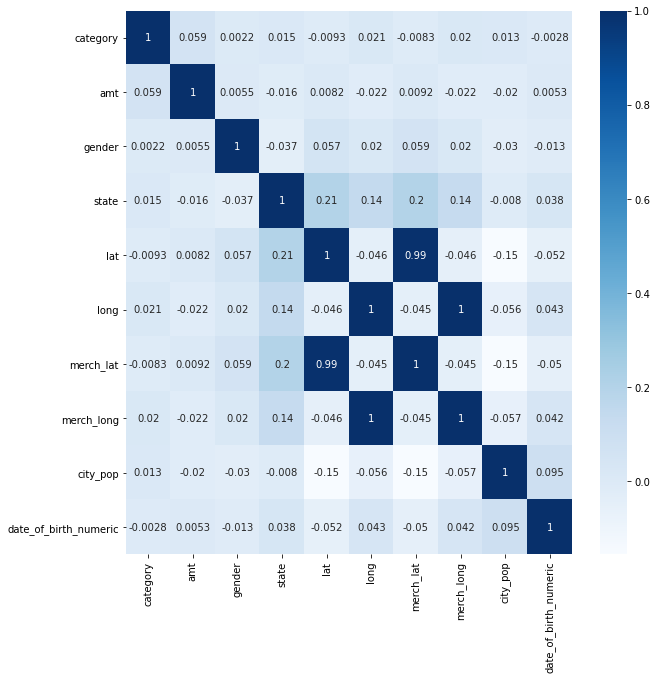

In [18]:
cols_x=['amt','lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'date_of_birth_numeric']
cols_y=['category', 'gender', 'state']

corrMatrix = subsamples.corr()
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

# Step 2:
Using univariate parametric distributions that were fitted in Lab#2 make sampling of
chosen target variables. Use for this 2 different sampling methods.

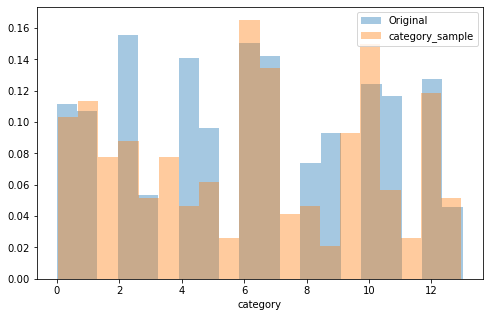

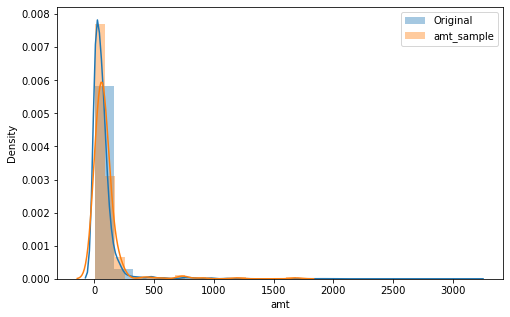

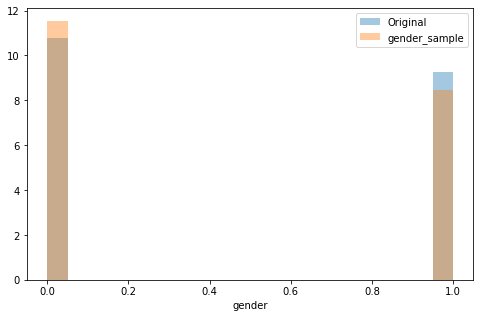

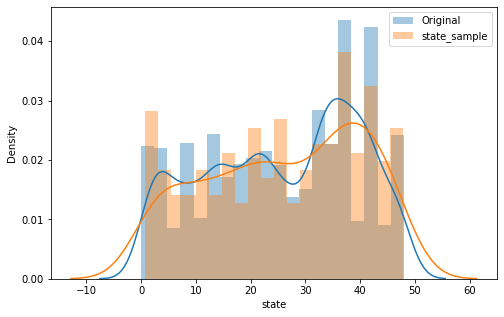

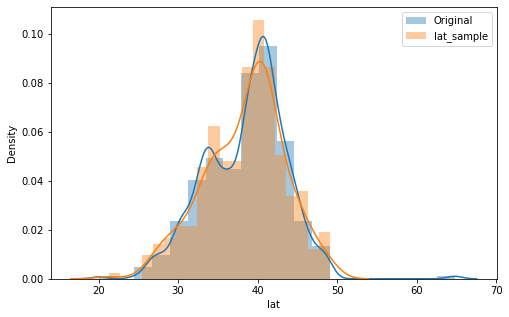

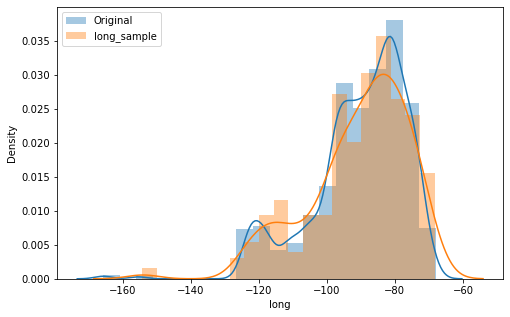

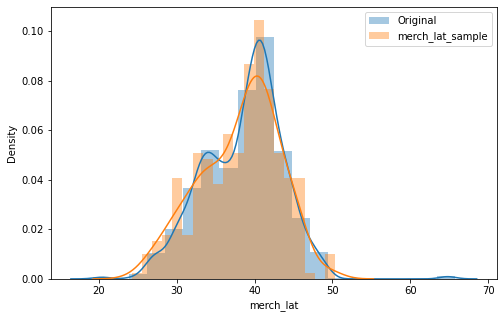

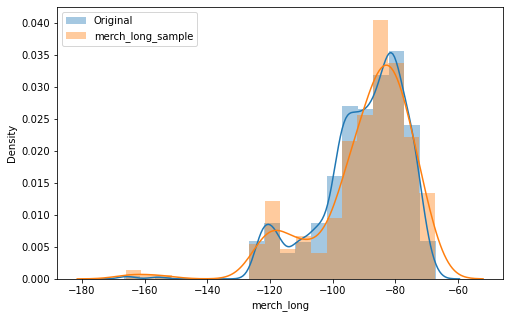

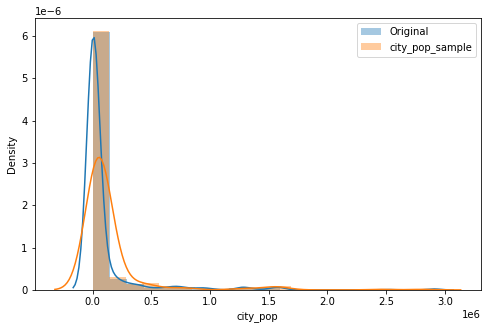

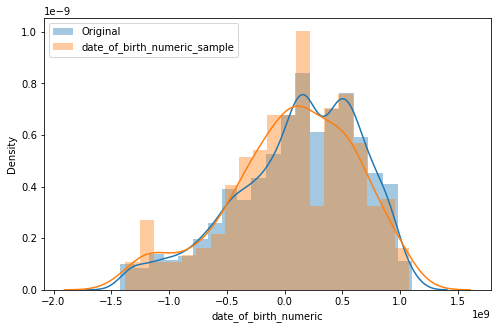

In [23]:
from functools import partial

def invtrans_sampling(values, n_samples=1000):
    n_bins = int(1 + (3.322 * np.log(values.shape[0])).round())
    
    hist, bin_edges = np.histogram(values, bins=n_bins, density=True)
    
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist * np.diff(bin_edges))
    
    inversed_cdf = partial(np.interp, xp=cum_values, fp=bin_edges)
    uniform_values = np.random.rand(n_samples)
    
    return inversed_cdf(uniform_values), n_bins

df_ = subsamples.copy()

for target_var in subsamples:

    plt.figure(figsize=(8, 5))
    sampled_value, n_bins = invtrans_sampling(subsamples[target_var], n_samples=300)
    
    is_continuous = not target_var in ['category', 'gender']
    sns.distplot(subsamples[target_var], bins=20, label='Original', kde=is_continuous, norm_hist=True)
    sns.distplot(sampled_value, bins=20, label=target_var+'_sample', kde=is_continuous, norm_hist=True)
    plt.legend()
    plt.show()

In [ ]:
sampled_value.shape

(300,)

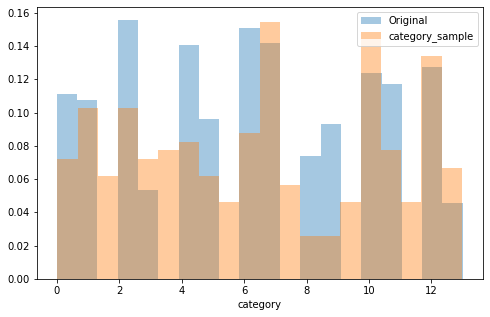

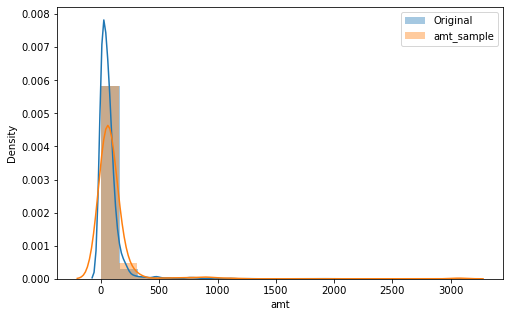

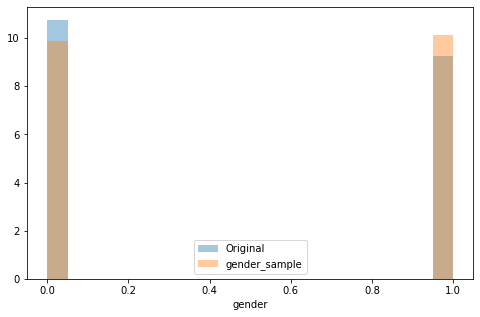

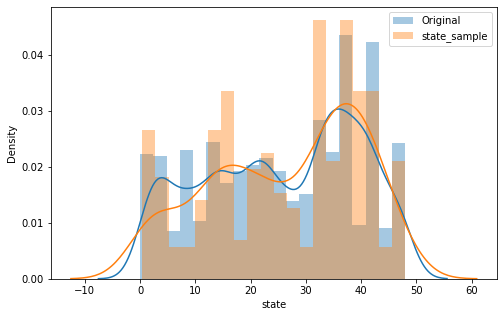

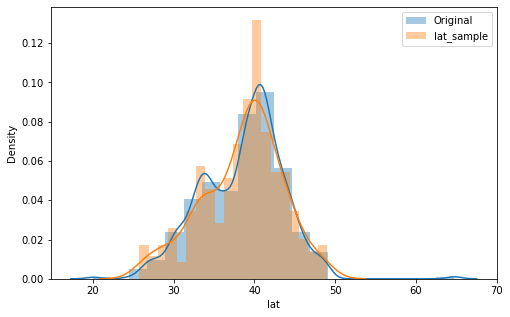

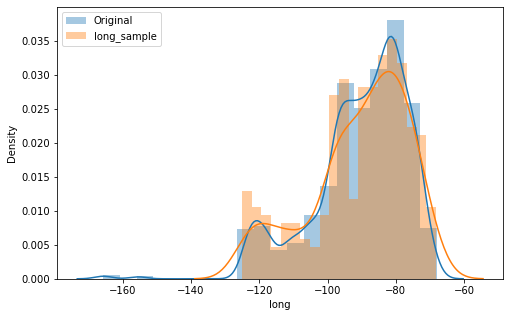

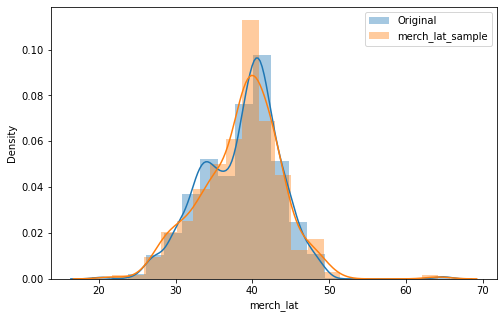

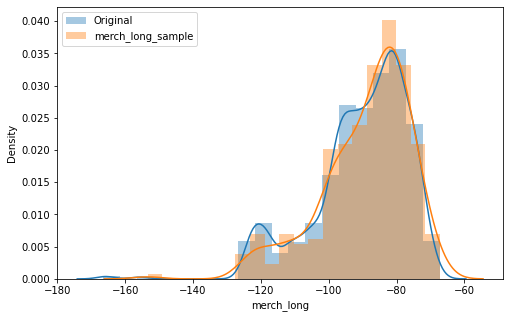

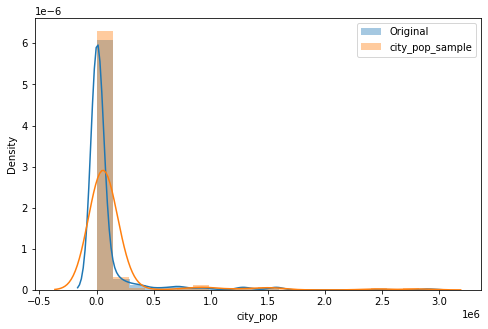

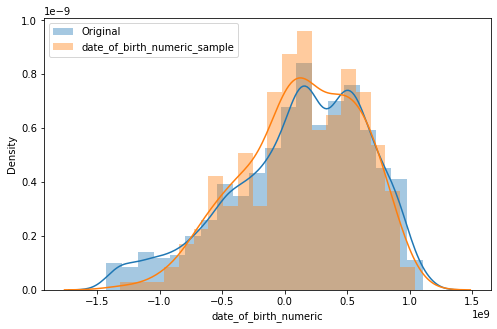

In [24]:
def sampling(values, n_samples=1000, batch_size=1000):

    n_bins = int(1 + (3.322 * np.log(values.shape[0])).round())
    hist, bin_edges = np.histogram(values, bins=n_bins, density=True)
    left, right = np.min(bin_edges), np.max(bin_edges)
    bottom, top = np.min(hist), np.max(hist)
    accept_samples = np.asarray([])
    
    while accept_samples.shape[0] < n_samples:
        x_sampl = np.random.uniform(left, right, size=(batch_size,))
        y_sampl = np.random.uniform(bottom, top, size=(batch_size,))
        x_indices = np.digitize(x_sampl, bin_edges) - 1
        y_mask = (y_sampl <= hist[x_indices])
        accept_samples = np.concatenate([accept_samples, x_sampl[y_mask]])
    
    return accept_samples[:n_samples], n_bins


sampled_inv = pd.DataFrame(cols)

for target_var in subsamples:

    plt.figure(figsize=(8, 5))
    sampled_value, n_bins = sampling(df_[target_var], n_samples=300)
    
    is_continuous = not target_var in ['category', 'gender']
    sns.distplot(subsamples[target_var], bins=20, label='Original', kde=is_continuous, norm_hist=True)
    sns.distplot(sampled_value, bins=20, label=target_var+'_sample', kde=is_continuous, norm_hist=True)
    plt.legend()
    plt.show()

Inverse transform sampling looks better, so we will use it further

In [26]:
sampled_df = subsamples.sample(1000)

# Step 3:
Estimate relations between predictors and chosen target variables. At least, they
should have significant correlation coefficients.

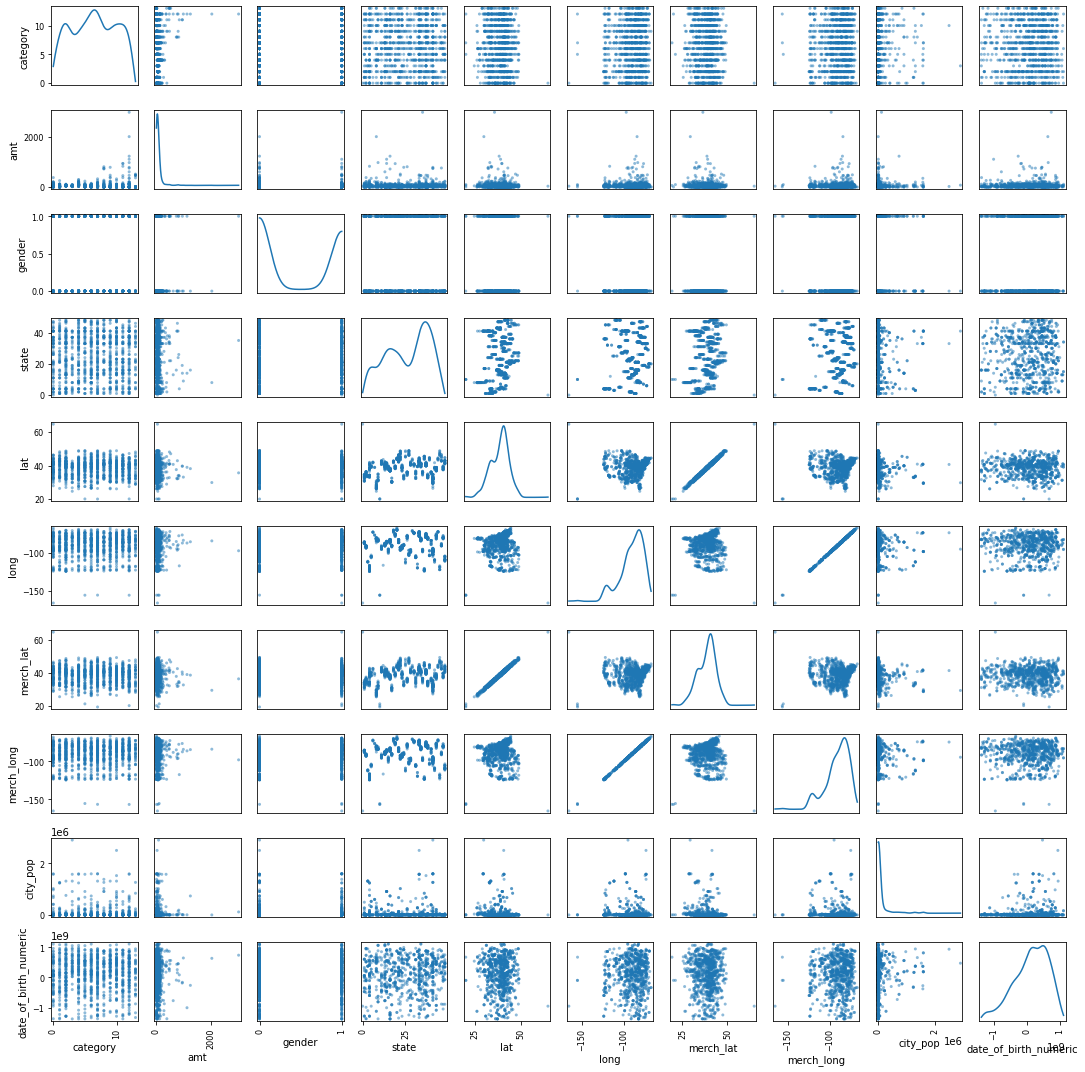

In [27]:
pd.plotting.scatter_matrix(sampled_df, diagonal="kde", figsize=(15, 15))
plt.tight_layout()
plt.show()

In [28]:
sampled_df.corr()[cols_y]

,category,gender,state
category,1.000000,0.001627,0.012466
amt,0.099428,0.002514,-0.010753
gender,0.001627,1.000000,-0.036805
state,0.012466,-0.036805,1.000000
lat,-0.037244,0.016306,0.184744
long,0.050436,0.024358,0.140932
merch_lat,-0.037037,0.016646,0.182840
merch_long,0.046798,0.024767,0.137336
city_pop,0.003184,0.002907,-0.027748
date_of_birth_numeric,0.016246,0.050717,0.058066


In [66]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, format(lo, '.4g'), format(hi, '.4g')


_, _, lo, hi = pearsonr_ci(subsamples['lat'], subsamples['merch_lat'],alpha=0.05)
print(lo, hi)

corr_ci = pd.DataFrame(columns=subsamples.columns, index=subsamples.columns)
for i in subsamples.columns:
    for j in subsamples.columns:
        corr_ci.at[i, j] = pearsonr_ci(subsamples[i], subsamples[j],alpha=0.05)[2:]
        
corr_ci
# subsamples

0.9932 0.9939


,category,amt,gender,state,lat,long,merch_lat,merch_long,city_pop,date_of_birth_numeric
category,"(1, 1)","(0.03091, 0.08616)","(-0.02553, 0.02991)","(-0.01262, 0.0428)","(-0.03705, 0.01838)","(-0.006533, 0.04888)","(-0.03601, 0.01943)","(-0.007384, 0.04803)","(-0.01492, 0.04051)","(-0.03053, 0.02491)"
amt,"(0.03091, 0.08616)","(1, 1)","(-0.0222, 0.03323)","(-0.0435, 0.01192)","(-0.0195, 0.03593)","(-0.04956, 0.005857)","(-0.01856, 0.03688)","(-0.04949, 0.005926)","(-0.04806, 0.007352)","(-0.02245, 0.03299)"
gender,"(-0.02553, 0.02991)","(-0.0222, 0.03323)","(1, 1)","(-0.06426, -0.008898)","(0.02938, 0.08464)","(-0.008014, 0.0474)","(0.03152, 0.08676)","(-0.008135, 0.04728)","(-0.0576, -0.002206)","(-0.04038, 0.01505)"
state,"(-0.01262, 0.0428)","(-0.0435, 0.01192)","(-0.06426, -0.008898)","(1, 1)","(0.179, 0.2321)","(0.1116, 0.166)","(0.176, 0.2292)","(0.1108, 0.1652)","(-0.03566, 0.01977)","(0.01052, 0.06588)"
lat,"(-0.03705, 0.01838)","(-0.0195, 0.03593)","(0.02938, 0.08464)","(0.179, 0.2321)","(1, 1)","(-0.07346, -0.01814)","(0.9932, 0.9939)","(-0.07382, -0.0185)","(-0.1813, -0.1272)","(-0.07994, -0.02465)"
long,"(-0.006533, 0.04888)","(-0.04956, 0.005857)","(-0.008014, 0.0474)","(0.1116, 0.166)","(-0.07346, -0.01814)","(1, 1)","(-0.07288, -0.01756)","(0.9991, 0.9992)","(-0.08342, -0.02815)","(0.01537, 0.0707)"
merch_lat,"(-0.03601, 0.01943)","(-0.01856, 0.03688)","(0.03152, 0.08676)","(0.176, 0.2292)","(0.9932, 0.9939)","(-0.07288, -0.01756)","(1, 1)","(-0.07312, -0.01779)","(-0.1788, -0.1246)","(-0.0774, -0.0221)"
merch_long,"(-0.007384, 0.04803)","(-0.04949, 0.005926)","(-0.008135, 0.04728)","(0.1108, 0.1652)","(-0.07382, -0.0185)","(0.9991, 0.9992)","(-0.07312, -0.01779)","(1, 1)","(-0.08446, -0.0292)","(0.01471, 0.07005)"
city_pop,"(-0.01492, 0.04051)","(-0.04806, 0.007352)","(-0.0576, -0.002206)","(-0.03566, 0.01977)","(-0.1813, -0.1272)","(-0.08342, -0.02815)","(-0.1788, -0.1246)","(-0.08446, -0.0292)","(1, 1)","(0.0678, 0.1227)"
date_of_birth_numeric,"(-0.03053, 0.02491)","(-0.02245, 0.03299)","(-0.04038, 0.01505)","(0.01052, 0.06588)","(-0.07994, -0.02465)","(0.01537, 0.0707)","(-0.0774, -0.0221)","(0.01471, 0.07005)","(0.0678, 0.1227)","(1, 1)"


It doesn't corellate much ¯\\_(ツ)_/¯

# Step 4
Build a Bayesian network for chosen set of variables. Choose its structure on the basis
of multivariate analysis and train distributions in nodes using chosen algorithm.

In [29]:
cols

['category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'merch_lat',
 'merch_long',
 'city_pop',
 'date_of_birth_numeric']

In [34]:
transformed_data = sampled_df.copy()
cols_to_transform = ['category',  'amt',  'state', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'date_of_birth_numeric']
est = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(sampled_df[cols])
transformed_data[cols] = data_discrete

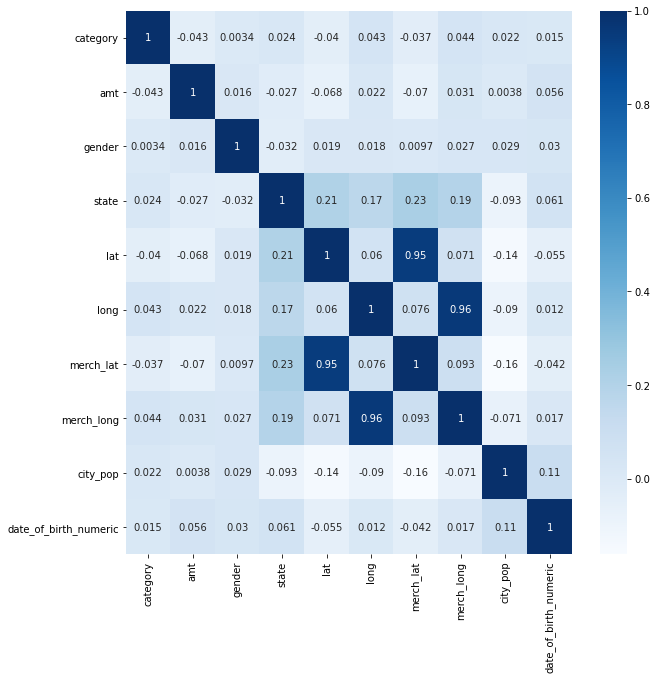

In [35]:
corrMatrix = transformed_data.corr()
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

In [36]:
transformed_data.head()

,category,amt,gender,state,lat,long,merch_lat,merch_long,city_pop,date_of_birth_numeric
399552,3.0,0.0,1.0,4.0,4.0,5.0,4.0,5.0,1.0,6.0
1007281,4.0,1.0,1.0,1.0,0.0,5.0,1.0,5.0,0.0,4.0
799888,1.0,1.0,1.0,5.0,3.0,2.0,3.0,3.0,0.0,5.0
901657,2.0,0.0,1.0,4.0,4.0,6.0,4.0,6.0,0.0,4.0
97985,5.0,2.0,0.0,0.0,3.0,1.0,3.0,2.0,0.0,2.0


In [37]:
cols_x, cols_y

(['amt',
  'lat',
  'long',
  'merch_lat',
  'merch_long',
  'city_pop',
  'date_of_birth_numeric'],
 ['category', 'gender', 'state'])

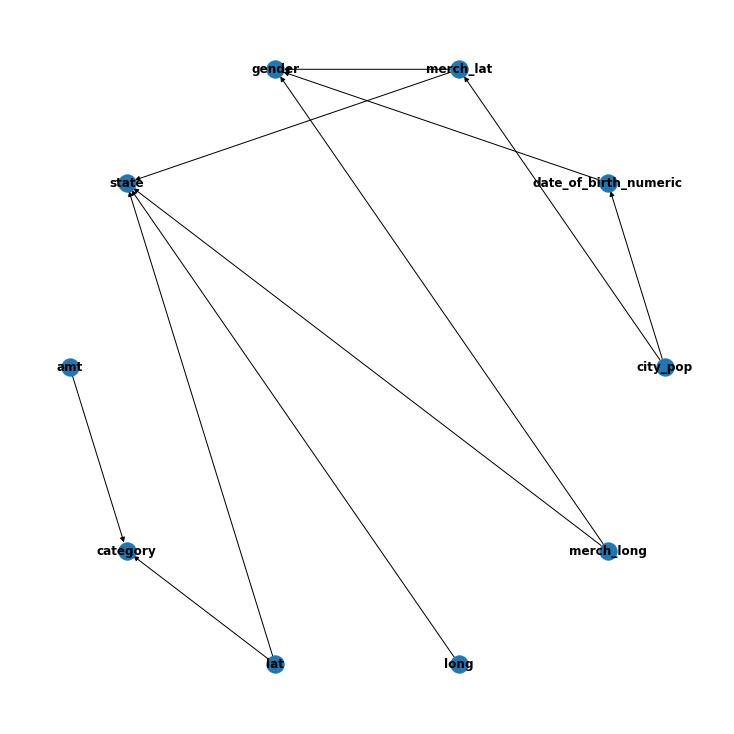

In [45]:
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, BDeuScore, K2Score, BicScore, HillClimbSearch, TreeSearch
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG

edges = {
    'city_pop': ['date_of_birth_numeric', 'merch_lat'],
    'date_of_birth_numeric': ['gender'],
    'amt': ['category'],
    'lat': ['category', 'state'],
    'merch_lat': ['gender', 'state'],
    'long': ['state'],
    'merch_long': ['gender', 'state']}

edges_list = []
for out_var, in_vars in edges.items():
    for in_var in in_vars:
        edges_list.append((out_var, in_var))
        
custom_model = BayesianModel(edges_list)
G_MAN = nx.DiGraph()
G_MAN.add_edges_from(custom_model.edges())
pos = nx.layout.circular_layout(G_MAN)
nx.draw(G_MAN, pos, with_labels=True, font_weight='bold')

In [46]:
custom_model.fit(transformed_data)
print(custom_model.check_model())

True


In [47]:
print(f"K2 score of custom model {K2Score(transformed_data).score(custom_model):.2f}")
print(f"BIC score of custom model {BicScore(transformed_data).score(custom_model):.2f}")

K2 score of custom model -14012.69
BIC score of custom model -65258.59


# Step 5
Build a Bayesian network for the same set of variables but using 2 chosen algorithms
for structural learning.

#### Hill Climb Search

In [48]:
hc = HillClimbSearch(transformed_data)

In [50]:
blacklist = [(x, y) for y in transformed_data.columns.to_list() for x in ['category', 'state', 'gender'] if x != y]

model_hc = hc.estimate(scoring_method='k2score', black_list = blacklist, fixed_edges={('date_of_birth_numeric', 'gender')})

  0%|          | 0/1000000 [00:00<?, ?it/s]

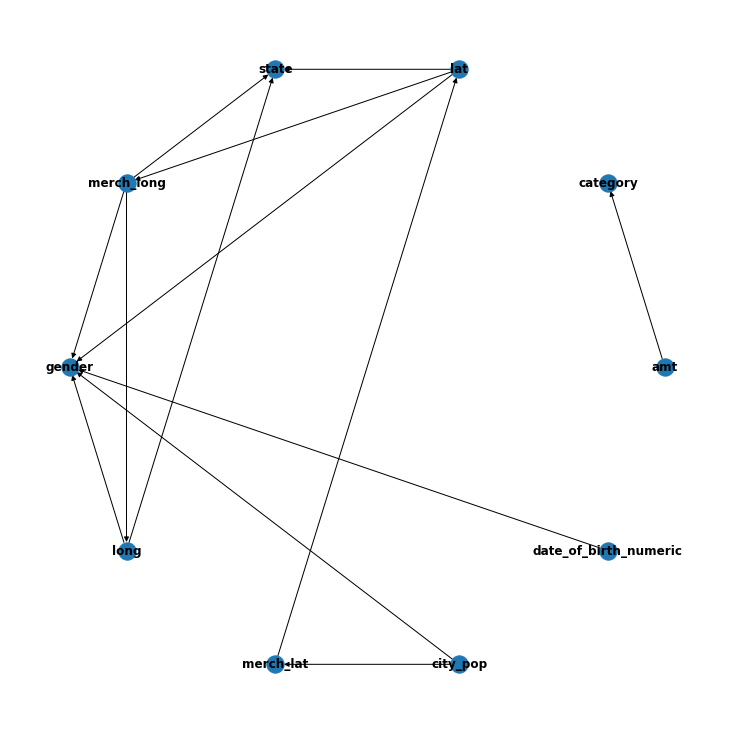

In [51]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(model_hc.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [52]:
print(f"K2 score of unconstrained model {K2Score(transformed_data).score(model_hc):.2f}")
print(f"BIC score of unconstrained model {BicScore(transformed_data).score(model_hc):.2f}")

K2 score of unconstrained model -11731.57
BIC score of unconstrained model -76472.07


#### Tree-Search

Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

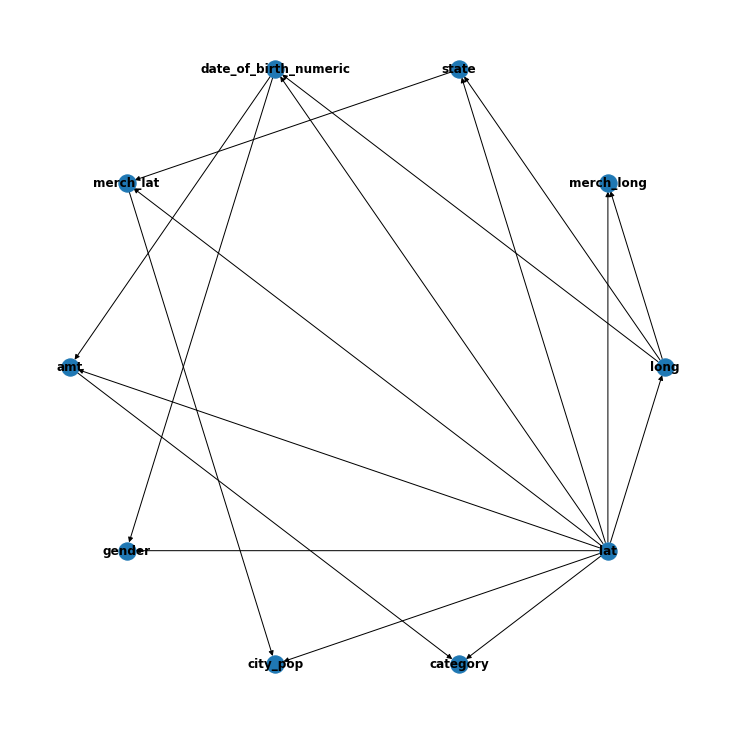

In [53]:
ts = TreeSearch(transformed_data)
model_ts = ts.estimate(estimator_type='tan')#, black_list=blacklist)
G_K2 = nx.DiGraph()
G_K2.add_edges_from(model_ts.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [54]:
print(f"K2 score of unconstrained model {K2Score(transformed_data).score(model_ts):.2f}")
print(f"BIC score of unconstrained model {BicScore(transformed_data).score(model_ts):.2f}")

K2 score of unconstrained model -12601.66
BIC score of unconstrained model -17841.60


In [55]:
def sampling (bn: DAG, data: pd.DataFrame, n: int=100, new: bool=False):
    if new:
        bn_new = BayesianModel(bn.edges())
        bn_new.fit(data)
    else:
        bn_new = bn
    sampler = BayesianModelSampling(bn_new)
    sample = sampler.forward_sample(size=n)
    return sample

In [56]:
df_k2c = sampling(model_ts, transformed_data, n=transformed_data.shape[0], new=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

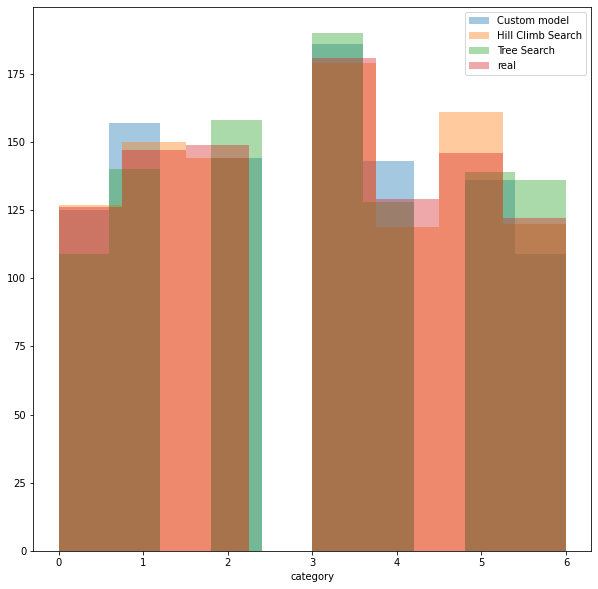

In [57]:
custom_res = sampling(custom_model, transformed_data, n=transformed_data.shape[0], new=True)
hc_res = sampling(model_hc, transformed_data, n=transformed_data.shape[0], new=True)
ts_res = sampling(model_ts, transformed_data, n=transformed_data.shape[0], new=True)

sns.distplot(custom_res['category'], label='Custom model', kde=False)
sns.distplot(hc_res['category'], label='Hill Climb Search', kde=False)
sns.distplot(ts_res['category'], label='Tree Search', kde=False)
sns.distplot(transformed_data['category'], label='real', kde=False)

plt.legend()
plt.show()